In [378]:
#importing all libraries
#for data manipulation
import numpy as np
import pandas as pd
# for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

#feacture engineering

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.preprocessing import StandardScaler
from Random

#model
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import precision_score, recall_score , classification_report, confusion_matrix,ConfusionMatrixDisplay, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [17]:
#Import the dataset using pandas

train_df = pd.read_csv("train_dsn.csv")
test_df= pd.read_csv("test_dsn.csv")

## EDA processes

In [19]:
train_df.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [438]:
train_df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [436]:
train_df.rename(columns={'Id':'id'}, inplace=True)
train_df.rename(columns={'Age':'age'}, inplace=True)
train_df.rename(columns={'Sex':'sex'}, inplace=True)

In [21]:
## test dataset
test_df= pd.read_csv("test_dsn.csv")

In [440]:
test_df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [442]:
#catboost
train_df.shape


(7303, 15)

In [444]:
test_df.shape

(2697, 14)

In [25]:
train_df.isnull().sum()

Id          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [446]:
test_df.isnull().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [448]:
train_df.duplicated().sum()

0

In [450]:
test_df.duplicated().sum()

0

In [452]:
train_df.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [454]:
#drop id later
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        7303 non-null   int64  
 1   age       7303 non-null   int64  
 2   sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


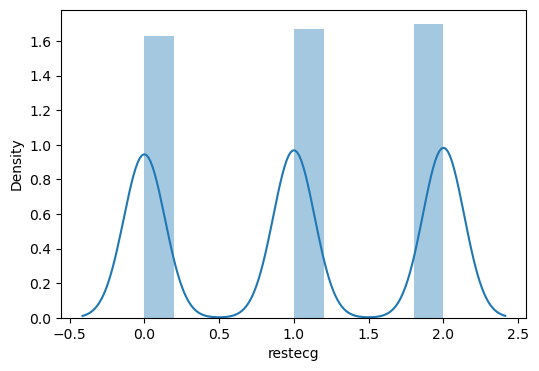

In [456]:
#checking for outliers
plt.figure(figsize=(6,4))
sns.distplot(train_df["restecg"])
plt.show()

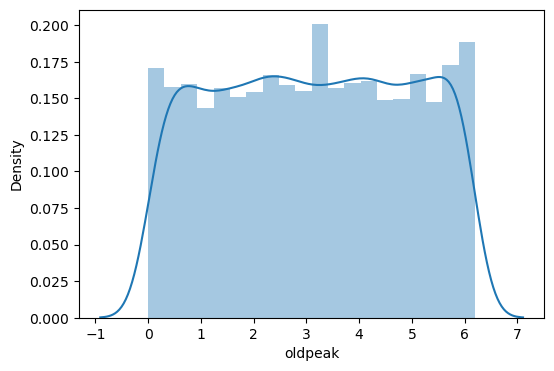

In [458]:
#checking for outliers
plt.figure(figsize=(6,4))
sns.distplot(train_df["oldpeak"])
plt.show()

### Feature selection
#### How to  know the best feature our  model

In [460]:

#using correlation matrix , i.e to check the correlation between the target  and feature

cor = train_df.corr()

In [462]:
cor

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
id,1.000000,-0.007837,0.002818,-0.018952,-0.016580,0.015200,-0.023790,0.001488,-0.012959,0.001735,0.004434,0.000617,0.033008,-0.000420,0.006148
age,-0.007837,1.000000,0.002335,-0.001771,-0.022767,0.004541,0.012960,-0.002644,0.000204,0.001495,0.007193,-0.004480,0.013257,0.002313,-0.002846
sex,0.002818,0.002335,1.000000,-0.030134,0.002793,-0.007434,-0.017675,-0.003850,-0.006331,0.027802,-0.004897,0.000663,0.010203,0.003261,0.030608
cp,-0.018952,-0.001771,-0.030134,1.000000,0.011924,0.024823,-0.016848,0.001544,0.019503,0.009621,0.000942,-0.009439,0.013676,-0.009296,-0.198082
trestbps,-0.016580,-0.022767,0.002793,0.011924,1.000000,-0.003238,0.003757,0.010334,0.001575,0.021449,0.011277,0.001750,-0.009947,0.005632,0.009320
chol,0.015200,0.004541,-0.007434,0.024823,-0.003238,1.000000,0.006588,0.003218,-0.014182,-0.006674,-0.003930,-0.013061,0.007788,0.011114,-0.012291
fbs,-0.023790,0.012960,-0.017675,-0.016848,0.003757,0.006588,1.000000,-0.002298,0.005419,0.010908,0.004803,0.000191,0.001255,-0.006554,0.003925
restecg,0.001488,-0.002644,-0.003850,0.001544,0.010334,0.003218,-0.002298,1.000000,-0.004714,-0.000270,0.017644,0.015365,0.003593,-0.007497,0.005911
thalach,-0.012959,0.000204,-0.006331,0.019503,0.001575,-0.014182,0.005419,-0.004714,1.000000,0.019037,0.012347,-0.010617,0.004899,0.007943,-0.004634
exang,0.001735,0.001495,0.027802,0.009621,0.021449,-0.006674,0.010908,-0.000270,0.019037,1.000000,0.018074,0.005094,-0.012028,0.010875,0.481897


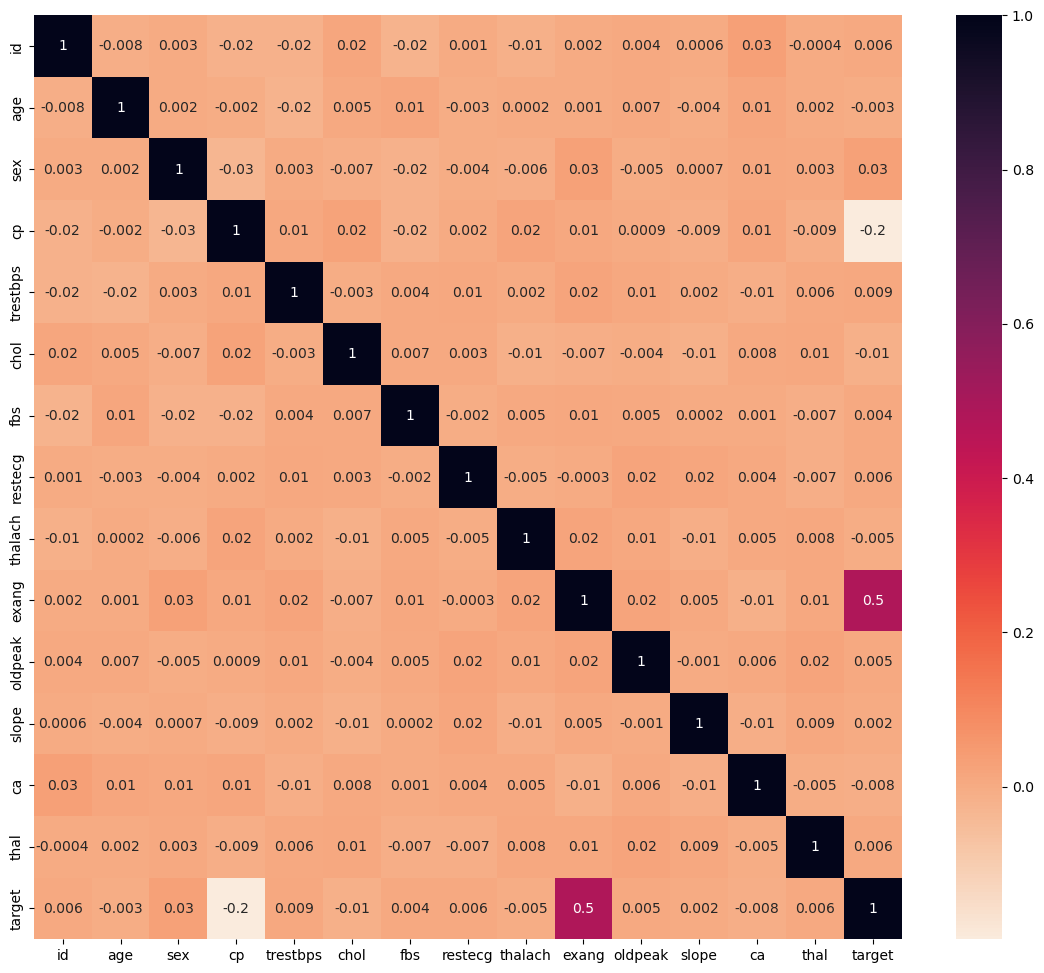

In [464]:
plt.figure(figsize=(14,12)) #fmt=format
sns.heatmap(cor,annot=True, fmt=".1g",cmap="rocket_r")

plt.show()

In [908]:
x=train_df.drop(["id", "target", ], axis=1) #independent variable
y = train_df["target"] #dependent varible 

In [910]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

#Using 80% of the data for training and 20% for testing

In [912]:
y_train.value_counts()

target
1    4740
0    1102
Name: count, dtype: int64

In [916]:
sampler = RandomUnderSampler()

In [918]:
X_train, y_train = sampler.fit_resample(X_train, y_train)

In [920]:
y_train.value_counts()

target
0    1102
1    1102
Name: count, dtype: int64

In [922]:
scaler  = StandardScaler()

In [924]:
scaler.fit(X_train)

StandardScaler()

In [926]:
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [953]:
catb = CatBoostClassifier()

In [931]:
#xgbclf = XGBClassifier(n_estimators=1000, random_state=42)

In [955]:
catb.fit(X_train_sc,y_train)

Learning rate set to 0.014437
0:	learn: 0.6771950	total: 4.51ms	remaining: 4.51s
1:	learn: 0.6609999	total: 9.2ms	remaining: 4.59s
2:	learn: 0.6446852	total: 13.3ms	remaining: 4.4s
3:	learn: 0.6312612	total: 17.6ms	remaining: 4.39s
4:	learn: 0.6179602	total: 21.6ms	remaining: 4.31s
5:	learn: 0.6051824	total: 26.4ms	remaining: 4.37s
6:	learn: 0.5902052	total: 29.5ms	remaining: 4.18s
7:	learn: 0.5788494	total: 33.6ms	remaining: 4.16s
8:	learn: 0.5681548	total: 38ms	remaining: 4.18s
9:	learn: 0.5576056	total: 42.5ms	remaining: 4.21s
10:	learn: 0.5472544	total: 46.6ms	remaining: 4.19s
11:	learn: 0.5342966	total: 49.5ms	remaining: 4.08s
12:	learn: 0.5221136	total: 52.8ms	remaining: 4.01s
13:	learn: 0.5134786	total: 59.4ms	remaining: 4.19s
14:	learn: 0.5032335	total: 62.8ms	remaining: 4.13s
15:	learn: 0.4958331	total: 67.4ms	remaining: 4.14s
16:	learn: 0.4875053	total: 71.6ms	remaining: 4.14s
17:	learn: 0.4804251	total: 75.9ms	remaining: 4.14s
18:	learn: 0.4713954	total: 80.8ms	remaining: 4.

In [935]:
xgbclf.fit(X_train_sc,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [959]:
catb.score(X_train_sc,y_train) 

0.9392014519056261

In [937]:
 xgbclf.score(X_train_sc,y_train)

1.0

In [961]:
y_pred= catb.predict(X_test_sc)

In [941]:
y_pred


array([0, 1, 1, ..., 1, 0, 0])

In [942]:
precision_score(y_test,y_pred)

0.9645748987854251

In [945]:
recall_score(y_test,y_pred)

0.7935054121565362

In [947]:
confusion_matrix(y_test,y_pred)

array([[225,  35],
       [248, 953]], dtype=int64)

In [949]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.87      0.61       260
           1       0.96      0.79      0.87      1201

    accuracy                           0.81      1461
   macro avg       0.72      0.83      0.74      1461
weighted avg       0.88      0.81      0.83      1461



In [963]:
accuracy_score(y_test, y_pred)

0.8145106091718002

In [965]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        2697 non-null   int64  
 1   age       2697 non-null   int64  
 2   sex       2697 non-null   int64  
 3   cp        2697 non-null   int64  
 4   trestbps  2697 non-null   int64  
 5   chol      2697 non-null   int64  
 6   fbs       2697 non-null   int64  
 7   restecg   2697 non-null   int64  
 8   thalach   2697 non-null   int64  
 9   exang     2697 non-null   int64  
 10  oldpeak   2697 non-null   float64
 11  slope     2697 non-null   int64  
 12  ca        2697 non-null   int64  
 13  thal      2697 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 295.1 KB


In [969]:
test_main=test_df.drop("id", axis=1)

In [971]:
test_main.isnull().sum()

sex         0
cp          0
trestbps    0
chol        0
restecg     0
thalach     0
exang       0
oldpeak     0
ca          0
thal        0
dtype: int64

In [973]:
X_test_main_sc = scaler.transform(test_main)

In [975]:
train_df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [977]:
sub_pred = catb.predict(scaler.transform(test_main))
sub_pred[:10]

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [979]:
sub_pred.shape

(2697,)

In [981]:
train_df["id"].shape

(7303,)

In [983]:
##submission
submission_df = pd.DataFrame(data=test_df["id"], columns = ["id"])
submission_df.head()



,id
0,16501
1,10444
2,14288
3,10409
4,17330


In [985]:
submission_df.shape


(2697, 1)

In [987]:
submission_df["target"] = sub_pred
submission_df.head()

,id,target
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,0


In [989]:
submission_df.to_csv("OniEmmanuelBamidele_6_submission.csv", index = False)